importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Loading and viewing data

In [4]:
df = pd.read_csv(r"C:\Mypythonfiles\Salary_EDA.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               371 non-null    object 
 2   Education Level      372 non-null    object 
 3   Job Title            370 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               372 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


1.age,year of experience and salary are in float data type
2.Gender,Educational level,job titles have object data type
3.null values exist
4.6 features and 375 entiers 

Handling Null values

In [6]:
df.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Conclusion : All the null values are droped.Now the features have non null values

Summery statistics

In [9]:
df.describe(include = 'all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,366.000000,366,366,366,366.000000,366.000000
unique,NaN,2,3,169,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,189,220,12,NaN,NaN
mean,37.459016,NaN,NaN,NaN,10.045082,100492.759563
std,6.962303,NaN,NaN,NaN,6.517102,48013.732434
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,32.000000,NaN,NaN,NaN,4.000000,56250.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


1.Age:
- Minimum age is 23,Maximum age is 53,average age is 37
- majority age limit between 32 and 44
- Few entries from 50s.
2.Gender:
- There are 2 unique values male and female
- Among 366, 189 entries are male, 177 entries are female ,so male is slightly dominate.
3.Educational level:
- Most of the Employes have Bachelor degree(dominating)
4.Job Titles:
- Among 366, 12 times director of marketing is repeated. Others are repeated less than 12 times.Which means no job titles is dominating in the dataset.
5.Years of Experience:
- Minimun experience is 0, Maximum experience is 25, Average experience is 10 years
- Majority of people have experience between 4 and 15.
6.Salary:
- Minimun salary is 350, Maximum salary is 250000, Average salary is 1Lakh
- Majority of salary falls between 56000 and 1Lakh
- there might be outliers, Min=350,avg=1Lakh,there is a lot of difference(error,part-time job may be) 

Visualizations

1.Analyse age distribution(Histogram)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


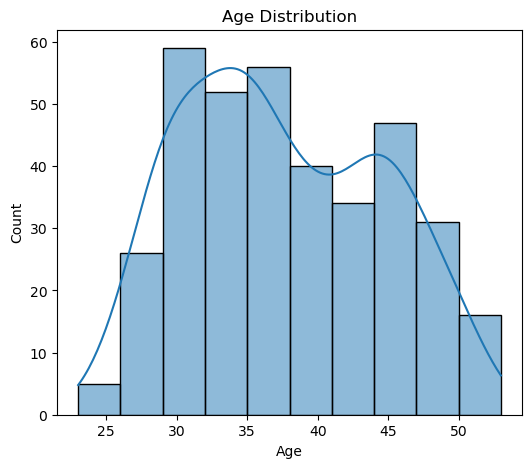

In [14]:
plt.figure(figsize=(6,5))
sns.histplot(df['Age'], kde = True,bins=10)
plt.title("Age Distribution")
plt.show()

1.The average age is 32
2.there is no outliers

analyse the distribution of salary 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


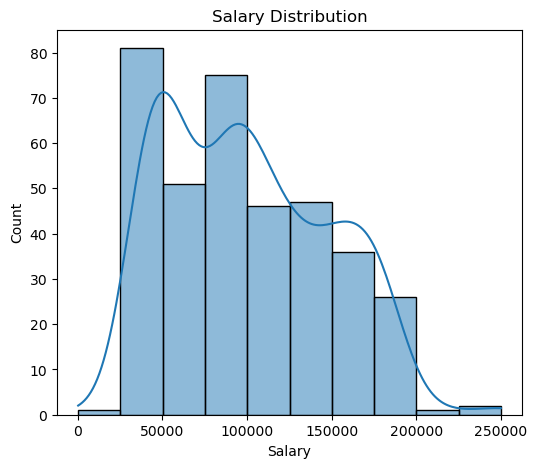

In [15]:
plt.figure(figsize=(6,5))
sns.histplot(df['Salary'], kde = True,bins=10)
plt.title("Salary Distribution")
plt.show()

1.the avg salary is 50000
2.there is slightly outlier
3.the range is between 0 to 250000
4.there is a positive skew
5.Majority salary is 50000

In [ ]:
analyse salary

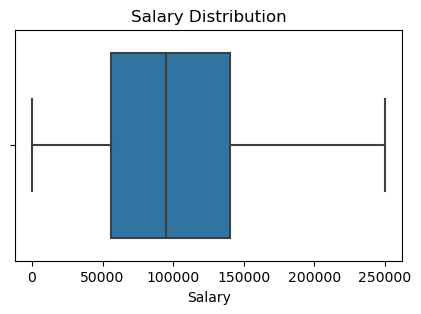

In [18]:
plt.figure(figsize = (5,3))
sns.boxplot(x = df['Salary'])
plt.title("Salary Distribution")
plt.show()

1.there is non outliers 2.average value around 90000 3.upper bound and lower bound is present 4.upper bound 250000 and lower bound 0

In [26]:
df = df.select_dtypes(include = ['number'])
df.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,36.0,7.0,60000.0


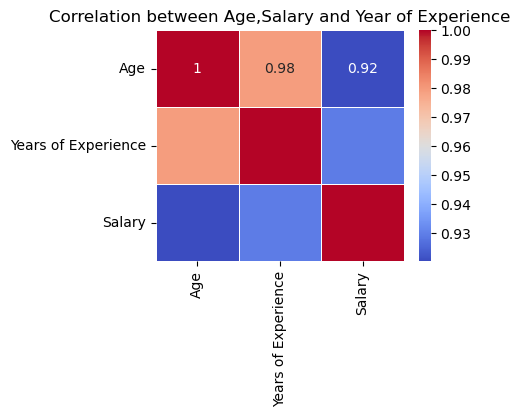

In [27]:
plt.figure(figsize = (4,3))
sns.heatmap(df.corr(),cmap = "coolwarm",annot = True, linewidths= 0.5)
plt.title("Correlation between Age,Salary and Year of Experience")
plt.show()

1.Age and Experience are more corelated related to each other
2.Age and Salary is also correlated to each other

group the educational level and find average salary in every catrgory

filter dataset in which weperience is more than 20 yrs and find the avg salary on that dataset

In [58]:
Fem_Master = df[(df['Gender']=='Female')&(df['Educational Level']=="Master's")]
Fem_Master['Salary'].mean()


KeyError: 'Gender'